# Comparing Regression Models

# Importing libraries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Reading Data Set

In [100]:
df=pd.read_csv(r'C:\Users\prith\Downloads\ChallengingDataset.csv')

# Exploring the dataset

In [101]:
df.head(8)

,Sample Number,X1,X2,X3,Y2,Z1
0,1,50,6,30,4.86,18
1,2,50,6,45,4.97,19
2,3,50,6,60,5.79,20
3,4,50,6,75,6.28,27
4,5,50,8,30,5.06,19
5,6,50,8,45,5.20,24
6,7,50,8,60,5.91,21
7,8,50,8,75,8.65,23


In [102]:
df.drop('Sample Number',axis=1,inplace=True)

In [103]:
df.head()

,X1,X2,X3,Y2,Z1
0,50,6,30,4.86,18
1,50,6,45,4.97,19
2,50,6,60,5.79,20
3,50,6,75,6.28,27
4,50,8,30,5.06,19


In [104]:
df['X1X2']=df['X1']*df['X2']
df['X1X3']=df['X1']*df['X3']
df['X2X3']=df['X2']*df['X3']

In [105]:
df.head()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3
0,50,6,30,4.86,18,300,1500,180
1,50,6,45,4.97,19,300,2250,270
2,50,6,60,5.79,20,300,3000,360
3,50,6,75,6.28,27,300,3750,450
4,50,8,30,5.06,19,400,1500,240


In [106]:
df.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
X1,64.0,125.000000,56.343617,50.00,87.5000,125.00,162.5000,200.00
X2,64.0,9.000000,2.253745,6.00,7.5000,9.00,10.5000,12.00
X3,64.0,52.500000,16.903085,30.00,41.2500,52.50,63.7500,75.00
Y2,64.0,7.531719,1.299308,4.86,6.9475,7.21,8.7025,10.13
Z1,64.0,30.687500,6.647293,18.00,25.7500,32.00,35.2500,44.00
X1X2,64.0,1125.000000,593.616840,300.00,600.0000,1100.00,1525.0000,2400.00
X1X3,64.0,6562.500000,3755.947664,1500.00,3562.5000,6000.00,9000.0000,15000.00
X2X3,64.0,472.500000,196.396101,180.00,345.0000,450.00,600.0000,900.00


# Correlation between each column

In [107]:
df.corr()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3
X1,1.000000,0.000000,0.000000,0.374505,0.894236,0.854242,0.787562,0.000000
X2,0.000000,1.000000,0.000000,0.392176,0.254285,0.474579,0.000000,0.602464
X3,0.000000,0.000000,1.000000,0.662444,0.137738,0.000000,0.562544,0.774597
Y2,0.374505,0.392176,0.662444,1.000000,0.553669,0.493426,0.659592,0.751400
Z1,0.894236,0.254285,0.137738,0.553669,1.000000,0.894629,0.755286,0.257153
X1X2,0.854242,0.474579,0.000000,0.493426,0.894629,1.000000,0.672768,0.285917
X1X3,0.787562,0.000000,0.562544,0.659592,0.755286,0.672768,1.000000,0.435745
X2X3,0.000000,0.602464,0.774597,0.751400,0.257153,0.285917,0.435745,1.000000


# Correlation Between the dependent and independent variables

In [108]:
df.corr()['Y2']

X1      0.374505
X2      0.392176
X3      0.662444
Y2      1.000000
Z1      0.553669
X1X2    0.493426
X1X3    0.659592
X2X3    0.751400
Name: Y2, dtype: float64

# Linear Regression

# Splitting into Training and Testing set for Linear Regression

In [109]:
X=df[['X1','X2','X3','X1X2','X1X3','X2X3']]
y=df['Y2']

In [110]:
X.head()

,X1,X2,X3,X1X2,X1X3,X2X3
0,50,6,30,300,1500,180
1,50,6,45,300,2250,270
2,50,6,60,300,3000,360
3,50,6,75,300,3750,450
4,50,8,30,400,1500,240


In [111]:
y.head()

0    4.86
1    4.97
2    5.79
3    6.28
4    5.06
Name: Y2, dtype: float64

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [113]:
from sklearn.linear_model import LinearRegression

# Creating Linear Regression Model

In [114]:
lr=LinearRegression()

In [115]:
lr.fit(X_train,y_train)

LinearRegression()

In [116]:
predictions=lr.predict(X_test)
linear_pred=lr.predict(X)

# Linear Regression Evaluation

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [118]:
#Defining the Adjusted R2 function
def adjusted_r2(predictions):
    n = df.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [119]:
Linear_MAE=mean_absolute_error(y_test,predictions)
Linear_MSE=mean_squared_error(y_test,predictions)
Linear_RMSE=np.sqrt(Linear_MSE)
Linear_R2=r2_score(y_test,predictions)
Linear_Adjusted_R2=adjusted_r2(predictions)

In [120]:
print('Mean Absolute Error: ',Linear_MAE)
print('Mean Squared Error: ',Linear_MSE)
print('Root Mean Squared Error: ',Linear_RMSE)
print('R2 Score: ',Linear_R2)
print('Adjusted R2 Score:',Linear_Adjusted_R2)

Mean Absolute Error:  0.7441473842335449
Mean Squared Error:  0.8283627080128011
Root Mean Squared Error:  0.9101443336157189
R2 Score:  0.4193414284297271
Adjusted R2 Score: 0.3582194735275932


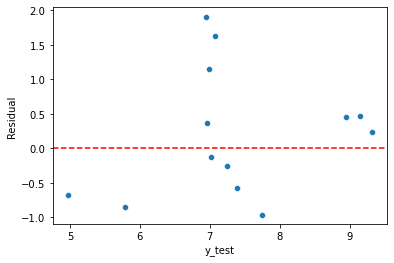

In [121]:
#Residual Graph
r=y_test-predictions
sns.scatterplot(x=y_test,y=r)
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [122]:
#Adding Predicted Y2 values in the dataframe for Linear Regression
df['LinearPrediction_Y2']=linear_pred
df.head()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3,LinearPrediction_Y2
0,50,6,30,4.86,18,300,1500,180,4.648187
1,50,6,45,4.97,19,300,2250,270,5.648293
2,50,6,60,5.79,20,300,3000,360,6.648399
3,50,6,75,6.28,27,300,3750,450,7.648506
4,50,8,30,5.06,19,400,1500,240,5.283681


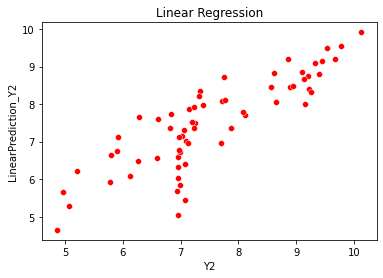

In [123]:
#Plotting Actual Y2 values vs Predicted Y2 values
sns.scatterplot(data=df,x='Y2',y='LinearPrediction_Y2',color='red')
plt.title("Linear Regression")
plt.show()

# Polynomial Regression

In [124]:
from sklearn.preprocessing import PolynomialFeatures

In [125]:
poly_conv=PolynomialFeatures(degree=3,include_bias=False)

In [126]:
poly_feat=poly_conv.fit_transform(X)

# Train Test Split for Polynomial Regression

In [127]:
X_train,X_test,y_train,y_test=train_test_split(poly_feat,y,test_size=0.2,random_state=101)

In [128]:
pr=LinearRegression()

In [129]:
pr.fit(X_train,y_train)

LinearRegression()

In [130]:
polypredict=pr.predict(X_test)
Polypredict_Y2=pr.predict(poly_feat)

# Evaluation of Polynomial Regression

In [131]:
#Defining the adjusted_r2 function
def adjusted_r2(predictions):
    n = df.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [132]:
Polynomial_MAE=mean_absolute_error(y_test,polypredict)
Polynomial_MSE=mean_squared_error(y_test,polypredict)
Polynomial_RMSE=np.sqrt(Polynomial_MSE)
Polynomial_R2=r2_score(y_test,polypredict)
Polynomial_Adjusted_R2=adjusted_r2(polypredict)

In [133]:
print('Mean Absolute Error: ',Polynomial_MAE)
print('Mean Squared Error: ',Polynomial_MSE)
print('Root Mean Squared Error: ',Polynomial_RMSE)
print('R2 Score: ',Polynomial_R2)
print('Adjusted R2 Score:',Polynomial_Adjusted_R2)

Mean Absolute Error:  3.325095848296386
Mean Squared Error:  22.364632809532672
Root Mean Squared Error:  4.72912600905629
R2 Score:  -14.676968090500058
Adjusted R2 Score: -16.327175257921116


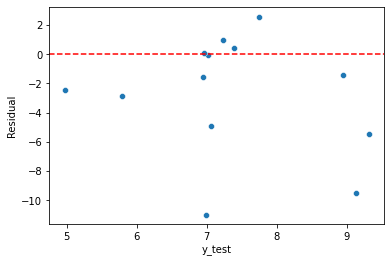

In [134]:
#Residual Graph
r=y_test-polypredict
sns.scatterplot(x=y_test,y=r)
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [135]:
#Adding Predicted y2 values for polynomial Regression in the dataframe
df['PolyPrediction_Y2']=Polypredict_Y2
df.head()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3,LinearPrediction_Y2,PolyPrediction_Y2
0,50,6,30,4.86,18,300,1500,180,4.648187,4.858393
1,50,6,45,4.97,19,300,2250,270,5.648293,7.419904
2,50,6,60,5.79,20,300,3000,360,6.648399,8.624828
3,50,6,75,6.28,27,300,3750,450,7.648506,6.280734
4,50,8,30,5.06,19,400,1500,240,5.283681,5.059106


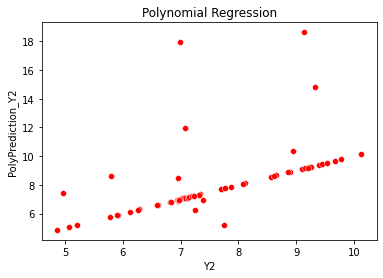

In [136]:
#Plotting Actual Y2 vs Predicted Y2 values for Polynomial regression
sns.scatterplot(data=df,x='Y2',y='PolyPrediction_Y2',color='red')
plt.title("Polynomial Regression")
plt.show()

# L1 Regularization-> Lasso Regression

In [137]:
from sklearn.linear_model import LassoCV

In [138]:
#We'll Be using same train and test set of Polynomial Regression but we will scale the data using Standard Scaler

# Scaling Training and testing set

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler=StandardScaler()

In [141]:
scaler.fit(X_train)

StandardScaler()

In [142]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pf=scaler.transform(poly_feat)

In [143]:
lar=LassoCV(eps=0.001,n_alphas=100, max_iter=30000)

In [144]:
lar.fit(X_train,y_train)

LassoCV(max_iter=30000)

In [145]:
lar.alpha_

0.001392237888565281

In [146]:
lapredictions=lar.predict(X_test)
LassoPredictions_Y2=lar.predict(pf)

# Lasso Model Evaluation

In [147]:
#Defining Adjusted R2 score
def adjusted_r2(predictions):
    n = df.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [148]:
Lasso_MAE=mean_absolute_error(y_test,lapredictions)
Lasso_MSE=mean_squared_error(y_test,lapredictions)
Lasso_RMSE=np.sqrt(Lasso_MSE)
Lasso_R2=r2_score(y_test,lapredictions)
Lasso_Adjusted_R2=adjusted_r2(lapredictions)

In [149]:
print('Mean Absolute Error: ',Lasso_MAE)
print('Mean Squared Error: ',Lasso_MSE)
print('Root Mean Squared Error: ',Lasso_RMSE)
print('R2 Score: ',Lasso_R2)
print('Adjusted R2 Score:',Lasso_Adjusted_R2)

Mean Absolute Error:  0.3080397949184999
Mean Squared Error:  0.15334930400896543
Root Mean Squared Error:  0.3915983963309419
R2 Score:  0.8925065228603153
Adjusted R2 Score: 0.8811914200035064


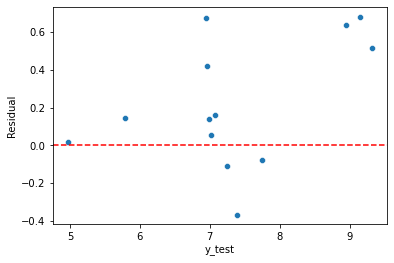

In [150]:
#Residual Graph
r=y_test-lapredictions
sns.scatterplot(x=y_test,y=r)
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [151]:
#Adding Predicted y2 values for lasso Regression in the dataframe
df['LassoPrediction_Y2']=LassoPredictions_Y2
df.head()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3,LinearPrediction_Y2,PolyPrediction_Y2,LassoPrediction_Y2
0,50,6,30,4.86,18,300,1500,180,4.648187,4.858393,4.832741
1,50,6,45,4.97,19,300,2250,270,5.648293,7.419904,4.953287
2,50,6,60,5.79,20,300,3000,360,6.648399,8.624828,5.643377
3,50,6,75,6.28,27,300,3750,450,7.648506,6.280734,7.105915
4,50,8,30,5.06,19,400,1500,240,5.283681,5.059106,5.173192


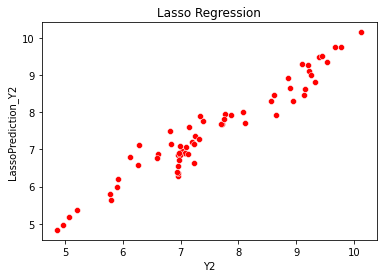

In [152]:
#Plotting Actual Y2 vs Predicted Y2 values for Lasso regression
sns.scatterplot(data=df,x='Y2',y='LassoPrediction_Y2',color='red')
plt.title("Lasso Regression")
plt.show()

# L2 Regularization->Ridge Regression

In [153]:
from sklearn.linear_model import RidgeCV

In [154]:
#We'll be using the same train and test set as Lasso Regression and scaling for those have already been done

In [155]:
rrcv=RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')


In [156]:
rrcv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [157]:
rrcv.alpha_

0.1

In [158]:
ridgepredictions=rrcv.predict(X_test)
ridgepredict_Y2=rrcv.predict(pf)

# Evaluation for Ridge Regression

In [159]:
#Defining the Adjusted r2 function
def adjusted_r2(predictions):
    n = df.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [160]:
Ridge_MAE=mean_absolute_error(y_test,ridgepredictions)
Ridge_MSE=mean_squared_error(y_test,ridgepredictions)
Ridge_RMSE=np.sqrt(Ridge_MSE)
Ridge_R2=r2_score(y_test,ridgepredictions)
Ridge_Adjusted_R2=adjusted_r2(ridgepredictions)

In [161]:
print('Mean Absolute Error: ',Ridge_MAE)
print('Mean Squared Error: ',Ridge_MSE)
print('Root Mean Squared Error: ',Ridge_RMSE)
print('R2 Score: ',Ridge_R2)
print('Adjusted R2 Score:',Ridge_Adjusted_R2)

Mean Absolute Error:  0.3489410739475509
Mean Squared Error:  0.18233967943728832
Root Mean Squared Error:  0.42701250501277865
R2 Score:  0.8721850986548744
Adjusted R2 Score: 0.8587308985132822


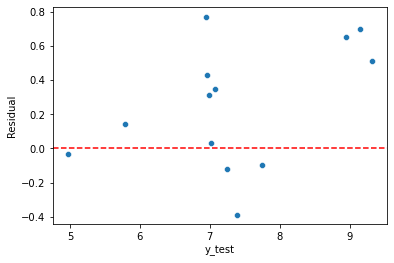

In [162]:
#Residual Graph
r=y_test-ridgepredictions
sns.scatterplot(x=y_test,y=r)
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [163]:
#Adding Predicted y2 values for Ridge Regression in the dataframe
df['RidgePrediction_Y2']=ridgepredict_Y2
df.head()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3,LinearPrediction_Y2,PolyPrediction_Y2,LassoPrediction_Y2,RidgePrediction_Y2
0,50,6,30,4.86,18,300,1500,180,4.648187,4.858393,4.832741,4.941656
1,50,6,45,4.97,19,300,2250,270,5.648293,7.419904,4.953287,5.003044
2,50,6,60,5.79,20,300,3000,360,6.648399,8.624828,5.643377,5.648999
3,50,6,75,6.28,27,300,3750,450,7.648506,6.280734,7.105915,7.109481
4,50,8,30,5.06,19,400,1500,240,5.283681,5.059106,5.173192,5.234152


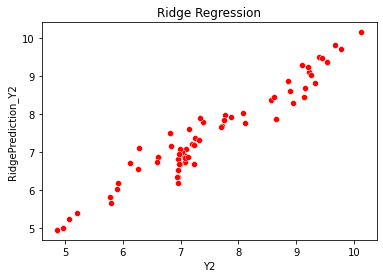

In [164]:
#Plotting Actual Y2 vs Predicted Y2 values for Ridge regression
sns.scatterplot(data=df,x='Y2',y='RidgePrediction_Y2',color='red')
plt.title("Ridge Regression")
plt.show()

# Elastic Net Regression

In [165]:
from sklearn.linear_model import ElasticNetCV

In [166]:
#We'll be using the same train and test set as Lasso Regression and Ridge Regression and scaling for those have already been done

In [167]:
er=ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,max_iter=2000)

In [168]:
er.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=2000,
             tol=0.01)

In [169]:
er.l1_ratio_

1.0

In [170]:
elasticpredictions=er.predict(X_test)
elasticpredict_Y2=er.predict(pf)

# Evaluation of Elastic Regression

In [171]:
#Defining the Adjusted r2 function
def adjusted_r2(predictions):
    n = df.shape[0]
    p = X.shape[1]
    r2 = r2_score(y_test, predictions)
    adjusted_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
    return adjusted_r2

In [172]:
Elastic_MAE=mean_absolute_error(y_test,elasticpredictions)
Elastic_MSE=mean_squared_error(y_test,elasticpredictions)
Elastic_RMSE=np.sqrt(Elastic_MSE)
Elastic_R2=r2_score(y_test,elasticpredictions)
Elastic_Adjusted_R2=adjusted_r2(elasticpredictions)

In [173]:
print('Mean Absolute Error: ',Elastic_MAE)
print('Mean Squared Error: ',Elastic_MSE)
print('Root Mean Squared Error: ',Elastic_RMSE)
print('R2 Score: ',Elastic_R2)
print('Adjusted R2 Score:',Elastic_Adjusted_R2)

Mean Absolute Error:  0.32748169613382266
Mean Squared Error:  0.15795376013927284
Root Mean Squared Error:  0.39743396953364823
R2 Score:  0.889278930775809
Adjusted R2 Score: 0.8776240813837889


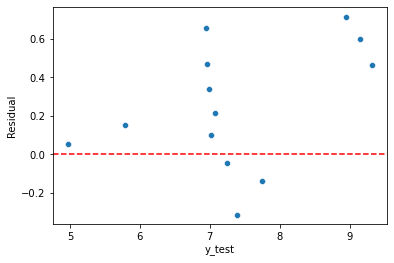

In [174]:
#Residual Graph
r=y_test-elasticpredictions
sns.scatterplot(x=y_test,y=r)
plt.xlabel('y_test')
plt.ylabel('Residual')
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

In [175]:
#Adding Predicted y2 values for Elastic Net Regression in the dataframe
df['ElasticNetPrediction_Y2']=elasticpredict_Y2
df.head()

,X1,X2,X3,Y2,Z1,X1X2,X1X3,X2X3,LinearPrediction_Y2,PolyPrediction_Y2,LassoPrediction_Y2,RidgePrediction_Y2,ElasticNetPrediction_Y2
0,50,6,30,4.86,18,300,1500,180,4.648187,4.858393,4.832741,4.941656,4.886834
1,50,6,45,4.97,19,300,2250,270,5.648293,7.419904,4.953287,5.003044,4.918621
2,50,6,60,5.79,20,300,3000,360,6.648399,8.624828,5.643377,5.648999,5.639503
3,50,6,75,6.28,27,300,3750,450,7.648506,6.280734,7.105915,7.109481,7.256762
4,50,8,30,5.06,19,400,1500,240,5.283681,5.059106,5.173192,5.234152,5.219528


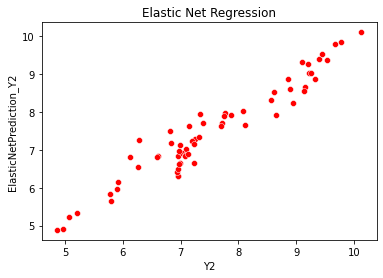

In [176]:
#Plotting Actual Y2 vs Predicted Y2 values for Elastic regression
sns.scatterplot(data=df,x='Y2',y='ElasticNetPrediction_Y2',color='red')
plt.title("Elastic Net Regression")
plt.show()

# Inferences

In [177]:
inference = {
	'Regression': ['Linear', 'Polynomial' , 'Lasso', 'Ridge', 'ElasticNet'],
	'MAE': 
		[
			Linear_MAE, 
			Polynomial_MAE,
			Lasso_MAE, 
			Ridge_MAE,
            Elastic_MAE
            
		],
	'MSE':
		[
			Linear_MSE, 
			Polynomial_MSE,
			Lasso_MSE, 
			Ridge_MSE,
            Elastic_MSE
            
		],
	'RMSE':
		[
			Linear_RMSE, 
			Polynomial_RMSE,
			Lasso_RMSE, 
			Ridge_RMSE,
            Elastic_RMSE
            
		],
	'R2':
		[
			Linear_R2, 
			Polynomial_R2,
			Lasso_R2, 
			Ridge_R2,
            Elastic_R2
            
		],
	'Adjusted R2':
		[
			Linear_Adjusted_R2, 
			Polynomial_Adjusted_R2,
			Lasso_Adjusted_R2, 
			Ridge_Adjusted_R2,
            Elastic_Adjusted_R2
            
		]
}

In [178]:
inference_frame_2 = pd.DataFrame(inference)
print(inference_frame_2)

   Regression       MAE        MSE      RMSE         R2  Adjusted R2
0      Linear  0.744147   0.828363  0.910144   0.419341     0.358219
1  Polynomial  3.325096  22.364633  4.729126 -14.676968   -16.327175
2       Lasso  0.308040   0.153349  0.391598   0.892507     0.881191
3       Ridge  0.348941   0.182340  0.427013   0.872185     0.858731
4  ElasticNet  0.327482   0.157954  0.397434   0.889279     0.877624


In [179]:
df.to_csv('Challenging_Task_ML.csv')

## From the above table, we can infer that Lasso is the best model for the given dataset as it has low MAE,MSE and RMSE values and high R2 and Adjusted R2 scores compared to the other models.